## Create a classification model to predict the gender (male or female) based on different acoustic parameters

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv('voice.csv')
print(df.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [180]:
print(df.shape)

(3168, 21)


In [181]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [182]:
## no null values are present

In [183]:
print(df.dtypes)

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


In [184]:
print(df.duplicated().sum())

2


In [185]:
## 2 records are duplicated so we will drop them
df.drop_duplicates(inplace = True)

In [186]:
print(df.shape)

(3166, 21)


In [187]:
print(df['label'].value_counts())

male      1583
female    1583
Name: label, dtype: int64


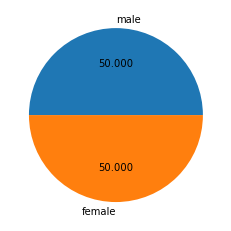

In [188]:
d = df['label'].value_counts()
plt.pie(x = d,labels = d.index,autopct = '%.3f')
plt.show()

In [189]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(3166, 20)
(3166,)


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2532, 20)
(634, 20)
(2532,)
(634,)


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [193]:
def gen_class_metrics(y_test,ypred_m) :
    c = confusion_matrix(y_test,ypred_m)
    print(c)
    print(classification_report(y_test,ypred_m))

def model_score(m) :
    print("Training Score :",m.score(x_train,y_train))
    print("Testing Score :",m.score(x_test,y_test))

In [194]:
# a) Decision Tree Classifier - 
m1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 11, min_samples_split = 25)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=25)

In [195]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['male' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'fe

In [196]:
model_score(m1)
print("Accuracy Score :",accuracy_score(y_test,ypred_m1))

Training Score : 0.9873617693522907
Testing Score : 0.9637223974763407
Accuracy Score : 0.9637223974763407


In [197]:
gen_class_metrics(y_test,ypred_m1)

[[324   9]
 [ 14 287]]
              precision    recall  f1-score   support

      female       0.96      0.97      0.97       333
        male       0.97      0.95      0.96       301

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [198]:
## No of missclassification are - 19

In [199]:
# Random Forest Classifier - 
m2 = RandomForestClassifier(criterion= 'entropy',max_depth= 12,min_samples_split= 25,n_estimators= 70)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=25,
                       n_estimators=70)

In [200]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

['male' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'fe

In [201]:
model_score(m2)
print("Accuracy Score :",accuracy_score(y_test,ypred_m2))

Training Score : 0.9877567140600316
Testing Score : 0.9794952681388013
Accuracy Score : 0.9794952681388013


In [202]:
gen_class_metrics(y_test,ypred_m2)

[[330   3]
 [ 10 291]]
              precision    recall  f1-score   support

      female       0.97      0.99      0.98       333
        male       0.99      0.97      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [203]:
## no of missclassification = 11

In [204]:
# 3) KNN -
m3 = KNeighborsClassifier(n_neighbors = 18)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [205]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

['male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'm

In [206]:
model_score(m3)
print("Accuracy Score :",accuracy_score(y_test,ypred_m3))

Training Score : 0.7334123222748815
Testing Score : 0.722397476340694
Accuracy Score : 0.722397476340694


In [207]:
gen_class_metrics(y_test,ypred_m3)

[[235  98]
 [ 78 223]]
              precision    recall  f1-score   support

      female       0.75      0.71      0.73       333
        male       0.69      0.74      0.72       301

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634



In [211]:
#### No. of missclassifiactions = 192
# 4) Logistic Regression - 
m4 = LogisticRegression(max_iter = 500)
m4.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [212]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

['male' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 

In [213]:
model_score(m4)
print("Accuracy Score :",accuracy_score(y_test,ypred_m4))

Training Score : 0.9067930489731437
Testing Score : 0.9258675078864353
Accuracy Score : 0.9258675078864353


In [214]:
gen_class_metrics(y_test,ypred_m4)

[[295  38]
 [  9 292]]
              precision    recall  f1-score   support

      female       0.97      0.89      0.93       333
        male       0.88      0.97      0.93       301

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



In [215]:
## No of missclassification = 46

In [216]:
# 5) SVM - 
m5 = SVC(kernel = 'linear',C = 0.1)
m5.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [217]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

['male' 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'

In [218]:
model_score(m5)
print("Accuracy Score :",accuracy_score(y_test,ypred_m5))

Training Score : 0.8250394944707741
Testing Score : 0.8280757097791798
Accuracy Score : 0.8280757097791798


In [219]:
gen_class_metrics(y_test,ypred_m5)

[[253  80]
 [ 29 272]]
              precision    recall  f1-score   support

      female       0.90      0.76      0.82       333
        male       0.77      0.90      0.83       301

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.84      0.83      0.83       634



In [220]:
## no of missclassifications are = 91

In [221]:
## ACCURACY SCORES - 
# 1) DECISION TREE - 0.9637
# 2) RANDOM FOREST - 0.9794
# 3) KNN - 0.7223
# 4) LOGISTIC REGRESSION - 0.9258
# 5) SVM - 0.8280
## SO MAXIMUM ACCURACY SCORE IS FOR RANDOM FOREST - 0.9794